In [4]:
import tensorflow as tf 
import random
import os 
import numpy as np 
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix
import pandas as pd 
import matplotlib.pyplot as plt

### Path system

In [5]:
# you need the current working directory NB: works both windows and linux 
current_working_directory = os.getcwd()
current_working_directory = os.path.dirname(current_working_directory)

# get the directory where I want to download the dataset
path_of_download = os.path.join(*['..', current_working_directory,'CVSF', 'Datasets', 'cookies_vs_chihuahua'])
print(f"[DIR] The directory of the current dataset is {path_of_download}")

[DIR] The directory of the current dataset is c:\CVSF\Datasets\cookies_vs_chihuahua


### Dataset function

In [6]:
# here let s do some functions that we can re-use also for other assignment
def load_the_data_and_the_labels(data_set_path: str, target_size: tuple or None = None):
    try:
        dataset, labels, name_of_the_labels = list(), list(), list() 
        # let s loop here and we try to discover how many class we have 
        for class_number, class_name in enumerate(os.listdir(data_set_path)):
            full_path_the_data = os.path.join(data_set_path, class_name)
            print(f"[WALK] I am walking into {full_path_the_data}")
            
            # add the list to nam _list
            name_of_the_labels.append(class_name)
            
            for single_image in os.listdir(f"{full_path_the_data}"):
                full_path_to_image = os.path.join(*[full_path_the_data, single_image])
                
                # add the class number 
                labels.append(class_number)
                
                if target_size is None:
                    # let s load the image 
                    image = tf.keras.utils.load_img(full_path_to_image)
                else:
                    image = tf.keras.utils.load_img(full_path_to_image, target_size=target_size)
                
                # transform PIL object in image                    
                image = tf.keras.utils.img_to_array(image)
                
                # add the image to the ds list 
                dataset.append(image)
                
        return np.array(dataset, dtype='uint8'), np.array(labels, dtype='int'), name_of_the_labels
    except Exception as ex:
        print(f"[EXCEPTION] load the data and the labels throws exceptions {ex}")

### load train set

In [ ]:


train_dataset, train_labels, train_labels_names = load_the_data_and_the_labels(
    "C:/CVSF/Datasets/cookies_vs_chihuahua/train", target_size=(224, 224))

[WALK] I am walking into C:/CVSF/Datasets/cookies_vs_chihuahua/train\chihuahua
[WALK] I am walking into C:/CVSF/Datasets/cookies_vs_chihuahua/train\muffin


In [8]:

train_dataset.shape

(4733, 224, 224, 3)

### load test set

In [ ]:

test_dataset, test_labels, test_labels_name = load_the_data_and_the_labels(
    "C:/CVSF/Datasets/cookies_vs_chihuahua/test", target_size=(224, 224))

[WALK] I am walking into C:/CVSF/Datasets/cookies_vs_chihuahua/test\chihuahua
[WALK] I am walking into C:/CVSF/Datasets/cookies_vs_chihuahua/test\muffin


In [10]:
test_dataset[0].shape, test_dataset[1].shape, test_dataset[2]

((224, 224, 3),
 (224, 224, 3),
 array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         .

### normalize the data

In [11]:

from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets with 30% test size
x_train, x_val, y_train, y_val = train_test_split(train_dataset, train_labels, test_size=0.3, random_state=42)

In [12]:
x_train_normalized = x_train / 255.0
x_val_normalized = x_val / 255.0
x_test_normalized = test_dataset / 255.0


### create a cnn with the following characteristics:
a.	Input layer
b.	Data augmentation, with random flip and random rotation.
c.	Two hidden layers each composed with the following characteristics: 16 conv2d units, max pooling 2d and batch normalization, the second one should have 24 conv2d units max pooling 2d and batch normalization. 
d.	After this, add a flatten layer and a dense layer with 8 units
e.	Add the final classifier (a  dense layer) with the correct number of output and activation

###  And Compiling the model using Adam and Binary cross entropy


In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, RandomFlip, RandomRotation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
# Create the CNN model
model = Sequential()

# Input Layer (224, 224, 3)
model.add(tf.keras.layers.InputLayer(input_shape=(224, 224, 3)))

# Data Augmentation Layer
model.add(RandomFlip("horizontal"))
model.add(RandomRotation(0.2))

# First convolutional layer: 16 filters, max pooling, and batch normalization
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

# Second convolutional layer: 24 filters, max pooling, and batch normalization
model.add(Conv2D(24, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

# Flattening layer
model.add(Flatten())

# Dense layer with 8 units
model.add(Dense(8, activation='relu'))

# Output layer with correct number of classes and activation function
num_classes = len(np.unique(train_labels))  # Assuming binary classification
output_activation = 'sigmoid' if num_classes == 2 else 'softmax'
model.add(Dense(1 if num_classes == 2 else num_classes, activation=output_activation))

# Compile the model
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 224, 224, 3)      0         
 tion)                                                           
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 16)     64        
 ormalization)                                                   
                                                        

### Training the model with a btach size of 64 and 30 epochs all together.

In [14]:
history = model.fit(
    x_train_normalized, y_train,
    validation_data=(x_val, y_val),
    batch_size=64,
    epochs=30,
    verbose=1
)

Epoch 1/30
52/52 [==============================] - 52s 943ms/step - loss: 0.9950 - accuracy: 0.5804 - val_loss: 125.0984 - val_accuracy: 0.7049
Epoch 2/30
52/52 [==============================] - 47s 909ms/step - loss: 0.6260 - accuracy: 0.6342 - val_loss: 902.9070 - val_accuracy: 0.5704
Epoch 3/30
52/52 [==============================] - 46s 879ms/step - loss: 0.6184 - accuracy: 0.6849 - val_loss: 1059.3723 - val_accuracy: 0.4930
Epoch 4/30
52/52 [==============================] - 47s 910ms/step - loss: 0.6431 - accuracy: 0.6079 - val_loss: 579.6101 - val_accuracy: 0.5268
Epoch 5/30
52/52 [==============================] - 55s 1s/step - loss: 0.6380 - accuracy: 0.6565 - val_loss: 970.4413 - val_accuracy: 0.5204
Epoch 6/30
52/52 [==============================] - 55s 1s/step - loss: 0.6123 - accuracy: 0.6589 - val_loss: 270.0031 - val_accuracy: 0.6648
Epoch 7/30
52/52 [==============================] - 57s 1s/step - loss: 0.5942 - accuracy: 0.6731 - val_loss: 1460.0958 - val_accuracy:

### Evaluate the model and report the accuracy.

In [15]:
loss, accuracy = model.evaluate(x_test_normalized, test_labels, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Test Loss: 0.4230, Test Accuracy: 0.8226


In [16]:
model.save('cnn_model.h5')

#### Make prediction with the test set and use a threshold of 0.5 as boundaries decision between the classes. 

In [59]:
# Predict on test set
y_pred_probs = model.predict(x_test_normalized)
y_pred = (y_pred_probs > 0.5).astype(int)  # Threshold of 0.5


for i in range(10):

    print(f"Predicted: {test_labels_name[y_pred[i][0]]}, Actual: {test_labels_name[test_labels[i]]}")
    print(f"Predicted: {y_pred[i][0]}, Actual:{ test_labels[i]}")


37/37 [==============================] - 3s 86ms/step
Predicted: chihuahua, Actual: chihuahua
Predicted: 0, Actual:0
Predicted: muffin, Actual: chihuahua
Predicted: 1, Actual:0
Predicted: chihuahua, Actual: chihuahua
Predicted: 0, Actual:0
Predicted: chihuahua, Actual: chihuahua
Predicted: 0, Actual:0
Predicted: muffin, Actual: chihuahua
Predicted: 1, Actual:0
Predicted: muffin, Actual: chihuahua
Predicted: 1, Actual:0
Predicted: chihuahua, Actual: chihuahua
Predicted: 0, Actual:0
Predicted: muffin, Actual: chihuahua
Predicted: 1, Actual:0
Predicted: chihuahua, Actual: chihuahua
Predicted: 0, Actual:0
Predicted: chihuahua, Actual: chihuahua
Predicted: 0, Actual:0


### Thus in our case Class 0 is Cihuahua and 1 is Muffin

### plot confusion matrix and ROC curve

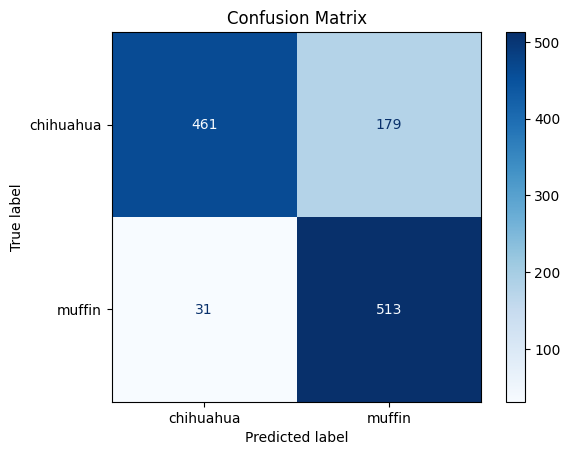

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns



cm = confusion_matrix(test_labels, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["chihuahua", "muffin"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


[0.        0.2203125 0.225     0.225     0.2484375 0.2484375 0.253125
 0.253125  0.275     0.275     0.2765625 0.2765625 0.2796875 0.2796875
 0.2828125 0.2828125 0.290625  0.290625  0.30625   0.30625   0.3171875
 0.3171875 0.3265625 0.3265625 0.328125  0.328125  0.3359375 0.3359375
 0.3484375 0.3484375 0.3609375 0.3609375 0.3703125 0.3703125 0.3796875
 0.3796875 0.3859375 0.3859375 0.403125  0.403125  0.4125    0.4125
 0.4171875 0.4171875 0.425     0.425     0.4265625 0.4265625 0.4546875
 0.4546875 0.4640625 0.4640625 0.48125   0.48125   0.4953125 0.4953125
 0.559375  0.559375  0.590625  0.590625  0.5984375 0.5984375 0.6
 0.6       0.671875  0.671875  0.6875    0.6875    0.7890625 0.7890625
 0.95625   0.95625   1.       ] [0.         0.92830882 0.92830882 0.93014706 0.93014706 0.93198529
 0.93198529 0.93382353 0.93382353 0.93566176 0.93566176 0.94117647
 0.94117647 0.94301471 0.94301471 0.94485294 0.94485294 0.94669118
 0.94669118 0.94852941 0.94852941 0.95036765 0.95036765 0.95220588


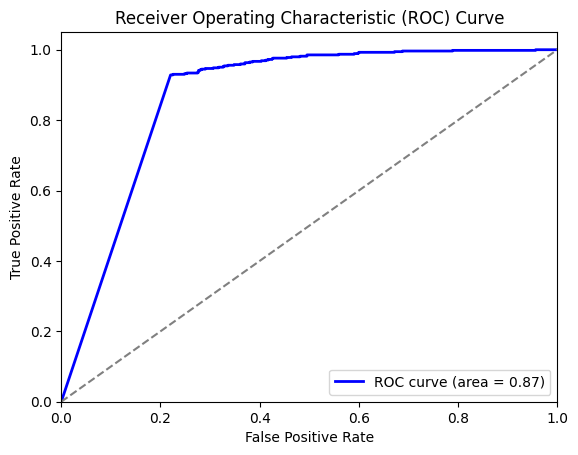

In [62]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, list_threshold= roc_curve(test_labels, y_pred_probs)
print(fpr, tpr, list_threshold)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Calcualte best threshold 

In [63]:

best_threshold_index = np.argmax(tpr - fpr)
best_threshold = list_threshold[best_threshold_index]
print(f"Best threshold: {best_threshold:.2f}")

Best threshold: 0.73


Now that we have got the Best Threshold value as 0.73 and we use this value as threshold and try to plot the confusion matrix again to find the values of TP,FP,TN,FN. 

### Plot confusion matrix 

In [64]:
# Predict on test set
y_pred_probs = model.predict(x_test_normalized)
y_pred = (y_pred_probs > 0.73).astype(int)  # Threshold of 0.5


for i in range(10):

    print(f"Predicted: {test_labels_name[y_pred[i][0]]}, Actual: {test_labels_name[test_labels[i]]}")
    print(f"Predicted: {y_pred[i][0]}, Actual:{ test_labels[i]}")

37/37 [==============================] - 3s 89ms/step
Predicted: chihuahua, Actual: chihuahua
Predicted: 0, Actual:0
Predicted: muffin, Actual: chihuahua
Predicted: 1, Actual:0
Predicted: chihuahua, Actual: chihuahua
Predicted: 0, Actual:0
Predicted: chihuahua, Actual: chihuahua
Predicted: 0, Actual:0
Predicted: muffin, Actual: chihuahua
Predicted: 1, Actual:0
Predicted: chihuahua, Actual: chihuahua
Predicted: 0, Actual:0
Predicted: chihuahua, Actual: chihuahua
Predicted: 0, Actual:0
Predicted: chihuahua, Actual: chihuahua
Predicted: 0, Actual:0
Predicted: chihuahua, Actual: chihuahua
Predicted: 0, Actual:0
Predicted: chihuahua, Actual: chihuahua
Predicted: 0, Actual:0


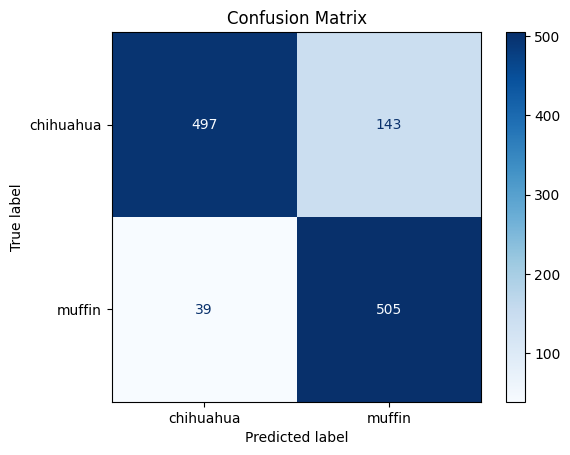

In [66]:

cm = confusion_matrix(test_labels, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["chihuahua", "muffin"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


<!-- Performance with the Optimal Threshold

Chihuahua Detection: The model correctly identified 36 more chihuahuas, an improvement of about 8%.
Muffin Detection: There was a slight decrease of 8 correctly identified muffins, approximately 1.5% fewer than before.
Overall Impact: This threshold notably improves chihuahua detection, with only a minimal trade-off in muffin detection. -->



**Performance with the Optimal Threshold**  

- **Chihuahua Detection**: The model correctly identified **36 more** chihuahuas, an improvement of about **8%**.
- **Muffin Detection**: There was a slight decrease of **8** correctly identified muffins (approximately **1.5%** fewer than before).
- **Overall Impact**: This threshold significantly improves chihuahua detection, with only a minimal trade-off in muffin detection.
